<a href="https://colab.research.google.com/github/Augusta02/Machine-Learning-Projects/blob/main/Predicting_Titanic_Disaster_Survival_with_Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as ans
import matplotlib.pyplot as plt

from google.colab import files
uploaded= files.upload()

Saving train.xlsx to train.xlsx


In [65]:
import io
data= pd.read_excel(io.BytesIO(uploaded['train.xlsx']))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Analysis**

In [66]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [68]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Preprocessing Data**

In [69]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
data['Cabin'].fillna((0), inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [72]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [73]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [74]:
data.drop(['Cabin'],axis=1,inplace=True)

In [75]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [76]:
data.drop(['Embarked'],axis=1,inplace=True)

In [77]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare'],
      dtype='object')

In [78]:
# change Sex values to binary and drop the first values and assign to gender.
gender= pd.get_dummies(data["Sex"],drop_first='first')

In [79]:
# assign new column Gender to the dataset for the new values of gender
data['Gender']=gender
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1


In [80]:
# drop columns that are not useful
data.drop(['Name','Sex','Ticket'], axis=1,inplace=True)
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.000000,1,0,7.2500,1
1,2,1,1,38.000000,1,0,71.2833,0
2,3,1,3,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1
887,888,1,1,19.000000,0,0,30.0000,0
888,889,0,3,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


In [81]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender         0
dtype: int64

# **Preparing Data For Modelling**

In [132]:

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# using 3 features for the first Decision Tree 
x= data[['PassengerId','Pclass','Fare']]
y= data['Survived']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)



In [133]:
data_tree= tree.DecisionTreeClassifier()
data_tree.fit(x_train,y_train)
data_pred= data_tree.predict(x_test)
print("score:{}".format(accuracy_score(y_test,data_pred)*100))

score:62.31343283582089


# **Decision Tree Visualization**




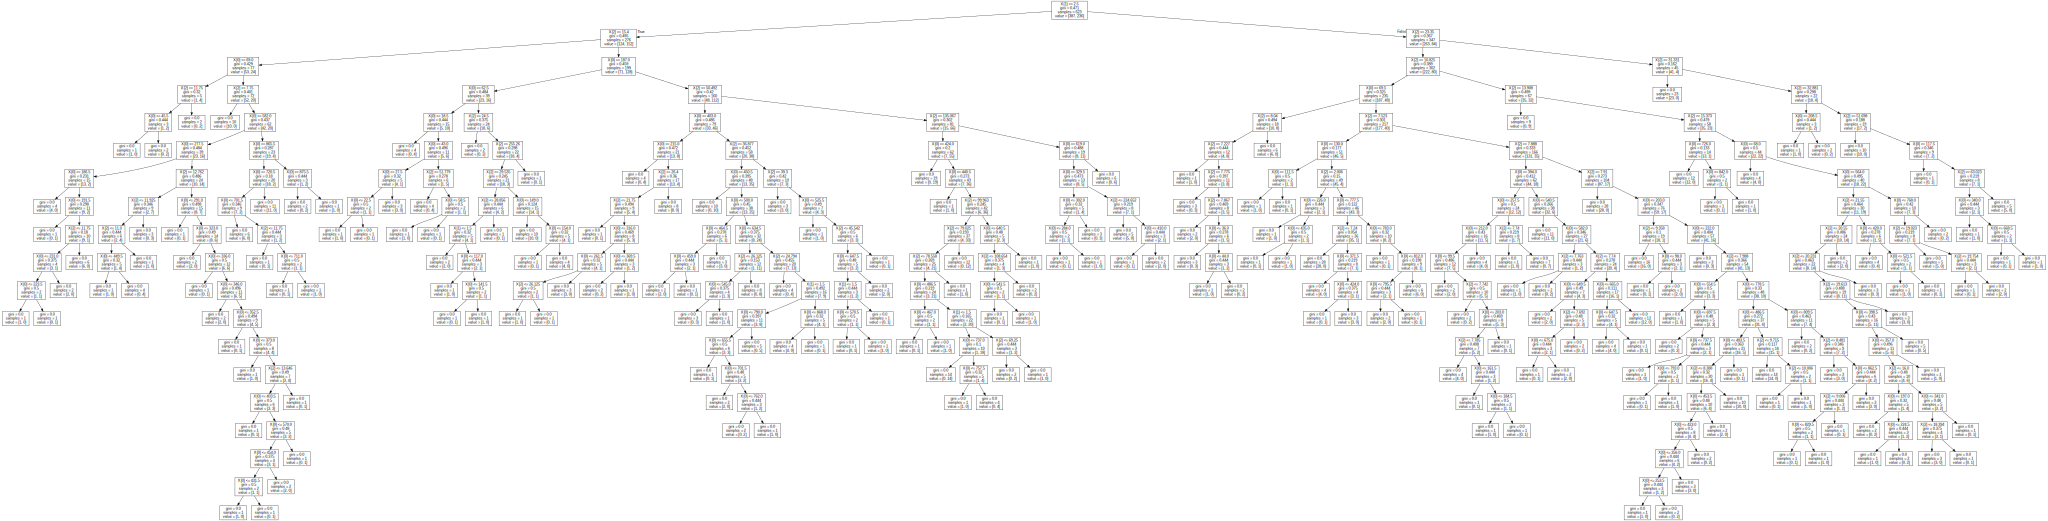

In [134]:
import graphviz
data_dot= tree.export_graphviz(data_tree,out_file=None)
data_graph= graphviz.Source(data_dot)
data_graph.render('data')
data_graph

# **Data Pruning**

In [135]:
datatree= tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)
datatree.fit(x_train,y_train)
datapred= datatree.predict(x_test)
print("score:{}".format(accuracy_score(y_test,datapred)*100))

score:69.40298507462687


Pruning the tree increases the model accuracy score.

# **Data Pruning Visualization**

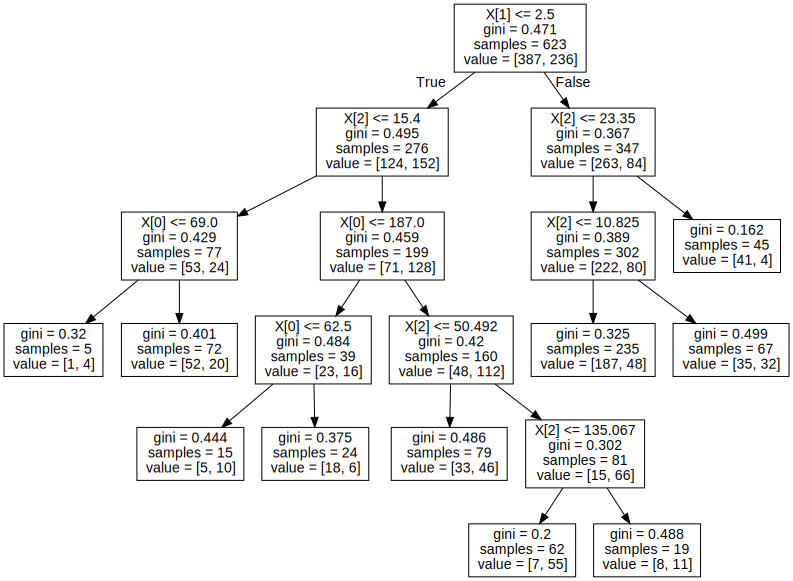

In [136]:
import graphviz
data_= tree.export_graphviz(datatree,out_file=None)
data_graph_= graphviz.Source(data_)
data_graph_.render('data')
data_graph_

In [144]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# modelling with new set of features
x= data[['SibSp','Parch','Age','Gender']]
y= data['Survived']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [145]:
data_tree_= tree.DecisionTreeClassifier()
data_tree_.fit(x_train,y_train)
data_tree_pred= data_tree_.predict(x_test)
print("score:{}".format(accuracy_score(y_test,data_tree_pred)*100))

score:78.73134328358209


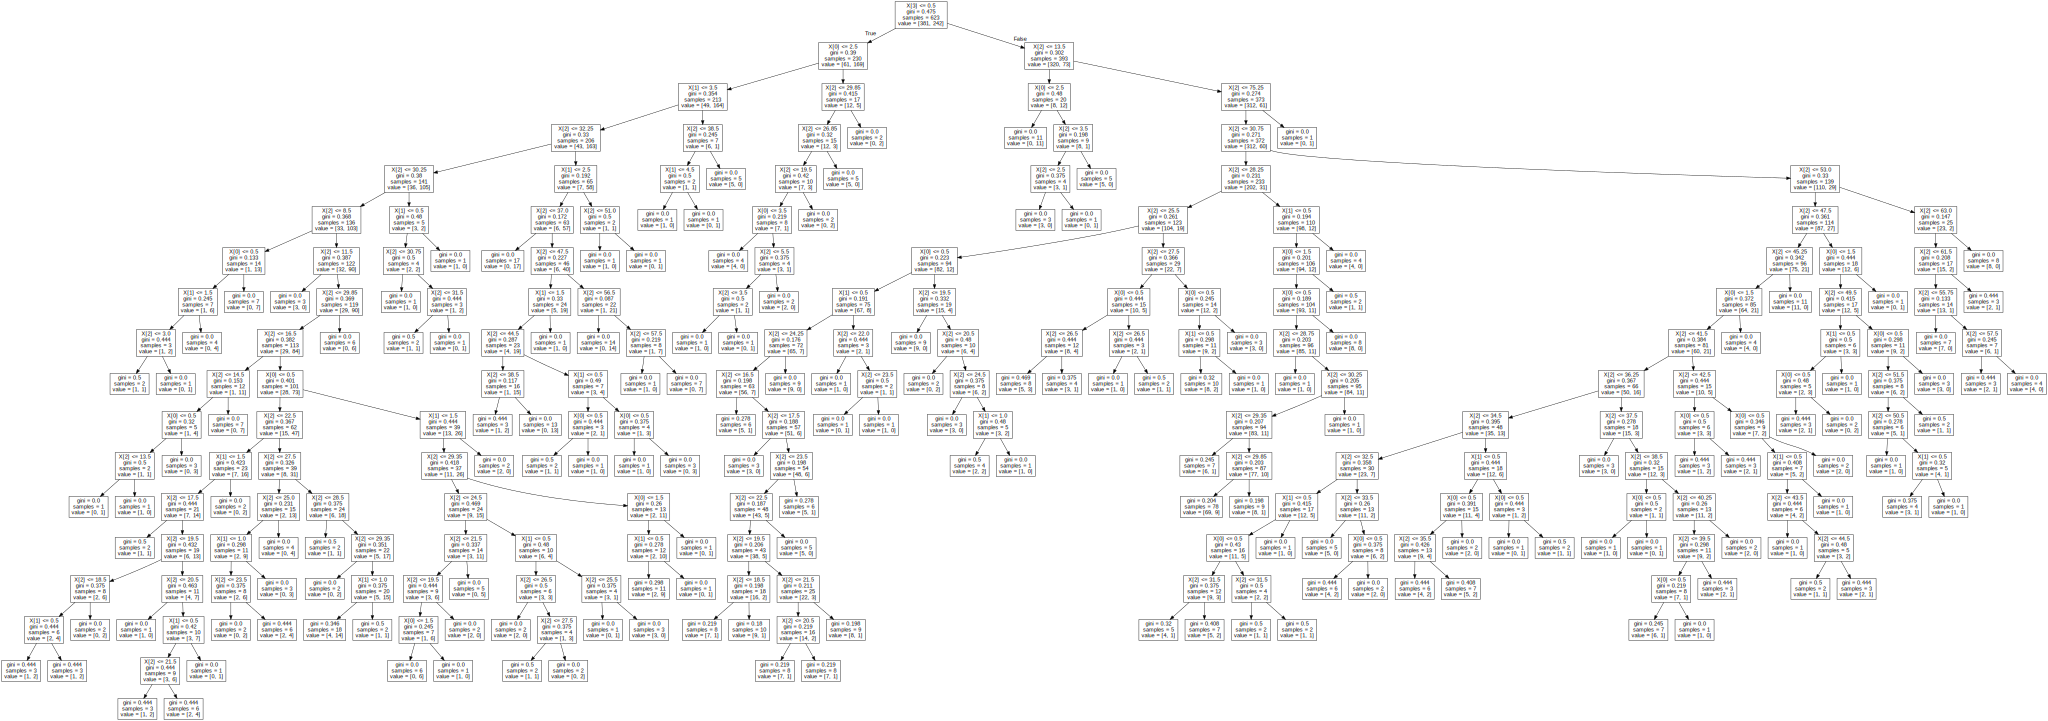

In [146]:
data_d= tree.export_graphviz(data_tree_,out_file=None)
data_d_graph=graphviz.Source(data_d)
data_d_graph.render('data')
data_d_graph

When a Gini Score is greater or equal to zero it implies that samples contained within that node belongs to a different class. Samples are simply the number of observations contained in the node. Values shows the class distribution or loss of the samples 

In [150]:
data_d_= tree.DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=12,min_samples_leaf=6,max_depth=6)
data_d_.fit(x_train,y_train)
data_d_pred= data_d_.predict(x_test)
print("score:{}".format(accuracy_score(y_test, data_d_pred)*100))

score:81.71641791044776


From the first Tree, using features like PassengerID, Pclass and Fare, gave a lower model accuracy rate compared to the second Tree which used features SibSp,Age,Parch and Gender to predict survivals. Pruning the trees gave a increased the model accuracy in both Trees.


# **Random Forest**

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x = data[['SibSp','Parch','Age','Gender']]
y= data['Survived']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

data_ran= RandomForestClassifier(n_estimators=12)
data_ran.fit(x_train,y_train)
data_pred_= data_ran.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, data_pred)*100)

Accuracy: 50.74626865671642


Using the same features in the second Decision tree to model a Random forest, the accuracy is lower even with the same number of estimates.